# Loading required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import os

# Data manipulation

In [3]:
# Reading data
# os.chdir('/Users/fahimahmad/Documents/Germany/MIT/2024-group-06-cdsp')
data_path = '../data_collection/attacks-on-health-care-systems-cleaned.csv'
df = pd.read_csv(data_path)

In [11]:
# extract 'year', 'year & month', 'year & month & day', and 'week day' from the 'attack date'
df['year_month_day'] = pd.to_datetime(df['Attack Date'])
df['year_month'] = df['year_month_day'].dt.strftime('%Y-%m')
df['year'] = df['year_month_day'].dt.year
df['week_days'] = df['year_month_day'].dt.day_name()

In [14]:
# check if the above columns are added correctly
df[['Attack Date', 'year', 'year_month', 'year_month_day','week_days']].head()

,Attack Date,year,year_month,year_month_day,week_days
0,2/8/24 12:00 AM,2024,2024-02,2024-02-08,Thursday
1,2/7/24 12:00 AM,2024,2024-02,2024-02-07,Wednesday
2,2/7/24 12:00 AM,2024,2024-02,2024-02-07,Wednesday
3,2/7/24 12:00 AM,2024,2024-02,2024-02-07,Wednesday
4,2/7/24 12:00 AM,2024,2024-02,2024-02-07,Wednesday


# Exploring the data through visualization

### Q) has the number of attacks on healthcare facilities increased or decreased?

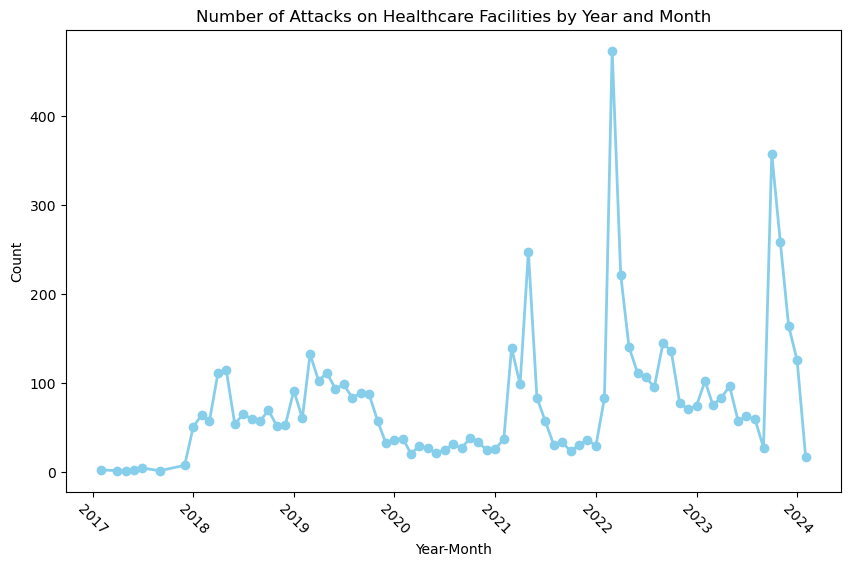

In [18]:
# number of attacks on healthcare facilities
attacks_by_date = pd.to_datetime(df['year_month']).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(attacks_by_date.index, attacks_by_date.values, marker='o', color='skyblue', linewidth=2)
plt.xticks(rotation=-45)

plt.title('Number of Attacks on Healthcare Facilities by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [51]:
# table
attacks_by_date = pd.to_datetime(df['year_month']).value_counts().sort_index().reset_index()

attacks_by_date['Year'] = attacks_by_date['index'].dt.year
attacks_by_date['Month'] = attacks_by_date['index'].dt.month

pivot_attacks = attacks_by_date.pivot_table(index='Month', columns='Year', values='year_month', aggfunc='sum')
pivot_attacks['Total'] = pivot_attacks.sum(axis=1)
pivot_attacks.loc['Total'] = pivot_attacks.sum(axis=0)

display(pivot_attacks)

Year,2017,2018,2019,2020,2021,2022,2023,2024,Total
Month,,,,,,,,,
1,NaN,50.0,91.0,36.0,25.0,29.0,74.0,125.0,430.0
2,2.0,64.0,60.0,37.0,37.0,83.0,102.0,16.0,401.0
3,NaN,57.0,132.0,20.0,139.0,473.0,75.0,NaN,896.0
4,1.0,111.0,102.0,29.0,98.0,221.0,83.0,NaN,645.0
5,1.0,114.0,111.0,26.0,247.0,140.0,96.0,NaN,735.0
6,2.0,53.0,93.0,21.0,83.0,111.0,57.0,NaN,420.0
7,4.0,65.0,98.0,24.0,57.0,106.0,62.0,NaN,416.0
8,NaN,59.0,83.0,31.0,30.0,95.0,59.0,NaN,357.0
9,1.0,57.0,88.0,26.0,33.0,144.0,27.0,NaN,376.0


### Q) In which countries the healthcare facilities are attacked most frequently?

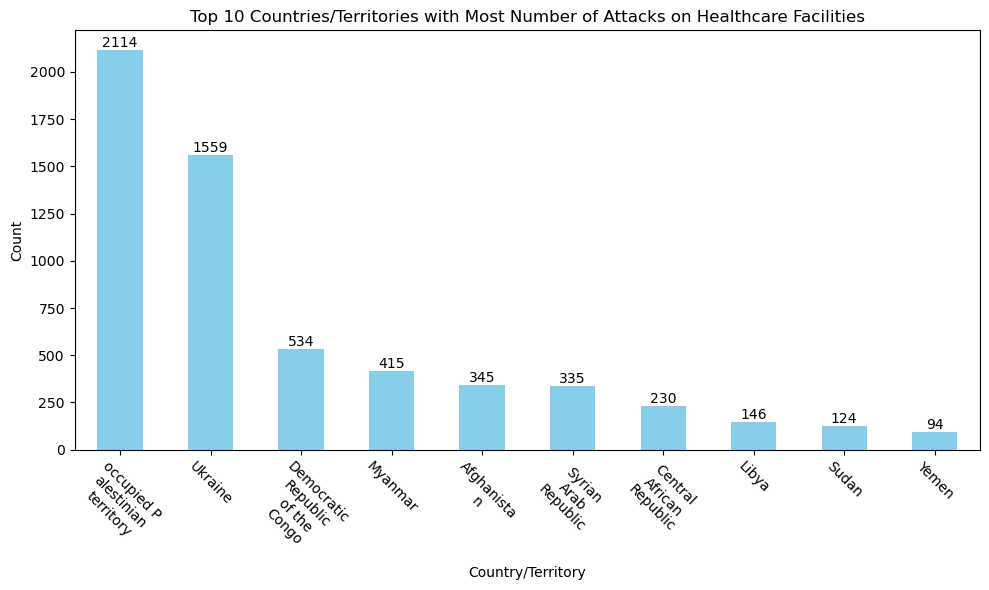

In [79]:
country_counts = df['Country / Territory'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = country_counts.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

wrapped_labels = [textwrap.fill(label, 10) for label in country_counts.index]
plt.xticks(range(len(country_counts)), wrapped_labels)
plt.xticks(rotation=-45)

plt.title('Top 10 Countries/Territories with Most Number of Attacks on Healthcare Facilities')
plt.xlabel('Country/Territory')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Q) Has the number of casualties increased over time?

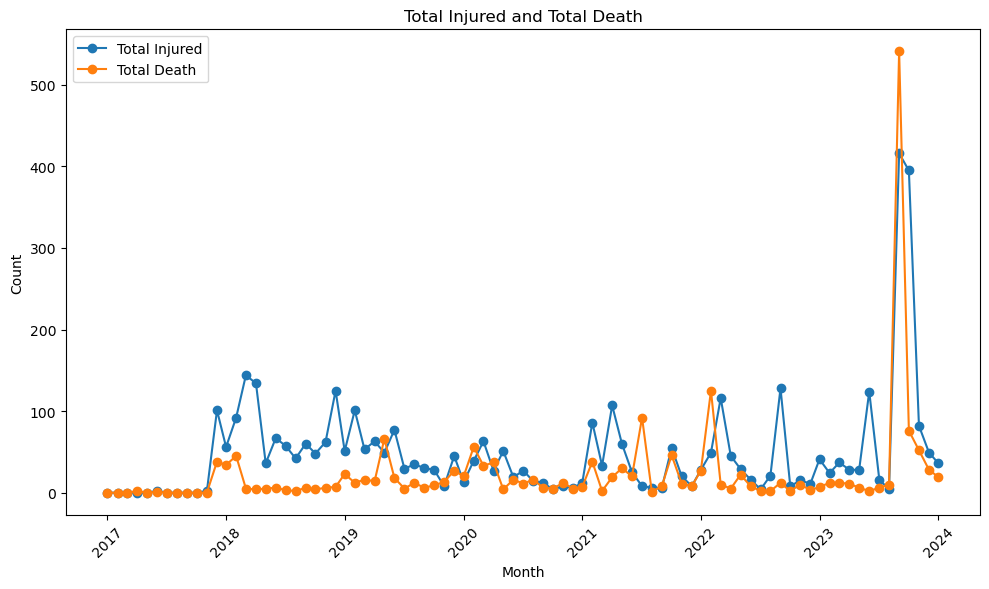

In [61]:
monthly_totals = df.resample('M', on='year_month_day')[['Total Injured', 'Total Death']].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_totals.index, monthly_totals['Total Injured'], label='Total Injured', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Total Death'], label='Total Death', marker='o')

plt.title('Total Injured and Total Death')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()

plt.xticks(monthly_totals.index[::12], [date.strftime('%Y') for date in monthly_totals.index[::12]], rotation=45)

plt.tight_layout()
plt.show()

In [78]:
# table
monthly_totals = df.resample('M', on='year_month_day')[['Total Injured', 'Total Death']].sum()

monthly_totals['Year'] = monthly_totals.index.year
monthly_totals['Month'] = monthly_totals.index.month

pivot_monthly_totals = monthly_totals.pivot_table(index='Month', columns='Year', values=['Total Injured', 'Total Death'], aggfunc='sum')

pivot_monthly_totals['All Death'] = pivot_monthly_totals['Total Death'].sum(axis=1)
pivot_monthly_totals['All Injured'] = pivot_monthly_totals['Total Injured'].sum(axis=1)
pivot_monthly_totals.loc['Total'] = pivot_monthly_totals.sum()

display(pivot_monthly_totals)

Total Death                                                  \
Year         2017   2018   2019   2020   2021   2022   2023  2024   
Month                                                               
1             NaN   38.0    7.0   27.0    5.0    8.0    3.0  28.0   
2             0.0   34.0   23.0   20.0    7.0   27.0    7.0  19.0   
3             0.0   45.0   12.0   56.0   38.0  125.0   12.0   NaN   
4             0.0    5.0   16.0   33.0    2.0   10.0   12.0   NaN   
5             2.0    4.0   14.0   37.0   19.0    5.0   11.0   NaN   
6             0.0    5.0   66.0    4.0   30.0   22.0    6.0   NaN   
7             1.0    6.0   18.0   16.0   20.0    8.0    2.0   NaN   
8             0.0    3.0    5.0   11.0   92.0    2.0    6.0   NaN   
9             0.0    2.0   12.0   16.0    1.0    2.0   10.0   NaN   
10            0.0    6.0    6.0    6.0    8.0   12.0  541.0   NaN   
11            0.0    4.0    9.0    5.0   46.0    2.0   76.0   NaN   
12            0.0    6.0   13.0   12.0   11.0   10.0   52.0   NaN   
Total         3.0  158.0  201.0  243.0  279.0  233.0  738.0  47.0   

      Total Injured                                                   \
Year           2017   2018   2019   2020   2021   2022    2023  2024   
Month                                                                  
1               NaN  101.0  125.0   45.0    6.0    8.0    11.0  49.0   
2               0.0   56.0   51.0   13.0   12.0   28.0    41.0  36.0   
3               0.0   92.0  101.0   39.0   86.0   49.0    24.0   NaN   
4               0.0  144.0   53.0   63.0   33.0  116.0    37.0   NaN   
5               0.0  134.0   63.0   27.0  107.0   45.0    28.0   NaN   
6               0.0   36.0   49.0   51.0   60.0   29.0    28.0   NaN   
7               2.0   67.0   77.0   19.0   25.0   16.0   124.0   NaN   
8               0.0   57.0   29.0   27.0    8.0    4.0    16.0   NaN   
9               0.0   42.0   35.0   14.0    6.0   21.0     4.0   NaN   
10              0.0   60.0   30.0   12.0    6.0  128.0   416.0   NaN   
11              0.0   48.0   28.0    4.0   55.0    8.0   395.0   NaN   
12              2.0   62.0    8.0    8.0   20.0   15.0    82.0   NaN   
Total           4.0  899.0  649.0  322.0  424.0  467.0  1206.0  85.0   

      All Death All Injured  
Year                         
Month                        
1         116.0       345.0  
2         137.0       237.0  
3         288.0       391.0  
4          78.0       446.0  
5          92.0       404.0  
6         133.0       253.0  
7          71.0       330.0  
8         119.0       141.0  
9          43.0       122.0  
10        579.0       652.0  
11        142.0       538.0  
12        104.0       197.0  
Total    1902.0      4056.0

### Q) What are top countries with most number of casualties?

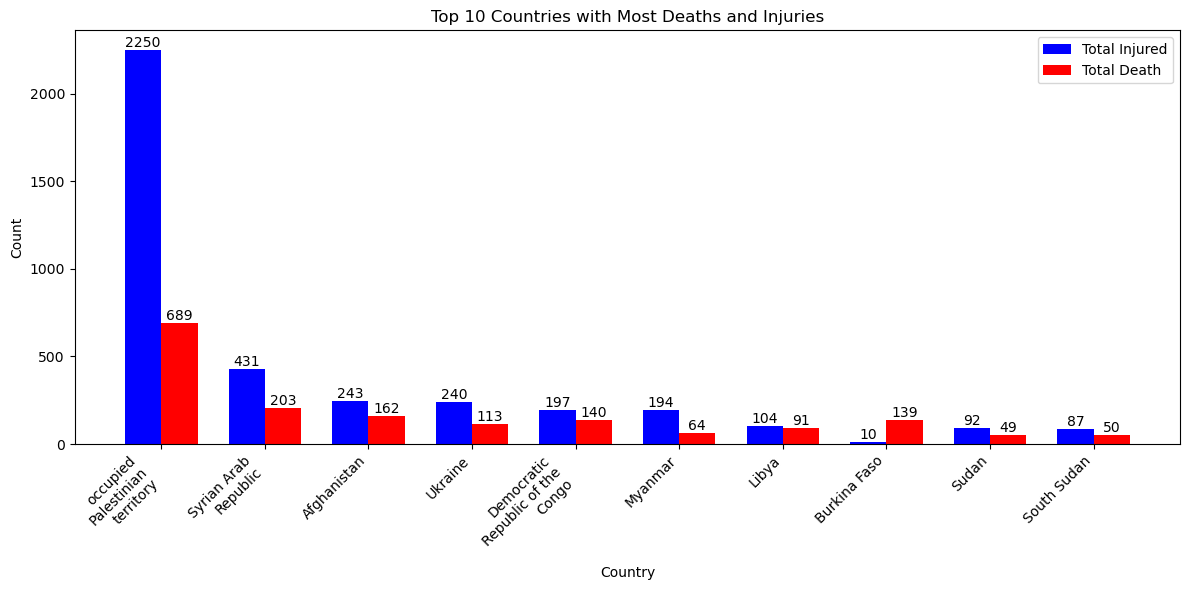

In [85]:
country_totals = df.groupby('Country / Territory')[['Total Injured', 'Total Death']].sum()
country_totals['Total Casualties'] = country_totals['Total Injured'] + country_totals['Total Death']
top_countries = country_totals.nlargest(10, 'Total Casualties')

wrapped_labels = [textwrap.fill(label, 15) for label in top_countries.index]

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(top_countries))

bars1 = plt.bar(index, top_countries['Total Injured'], bar_width, color='b', label='Total Injured')
bars2 = plt.bar([i + bar_width for i in index], top_countries['Total Death'], bar_width, color='r', label='Total Death')

plt.title('Top 10 Countries with Most Deaths and Injuries')
plt.xlabel('Country')
plt.ylabel('Count')

plt.xticks([i + bar_width / 2 for i in index], wrapped_labels, rotation=45, ha='right')

plt.legend()

# Adding data labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Q) What are the countries with the highest average casualties per attack?

/var/folders/9b/ny52bl9x5rj_jtsydmk5j96m0000gq/T/ipykernel_27786/1936139244.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casualties_per_country = df.groupby('Country / Territory')['Total Injured', 'Total Death'].sum().sum(axis=1)


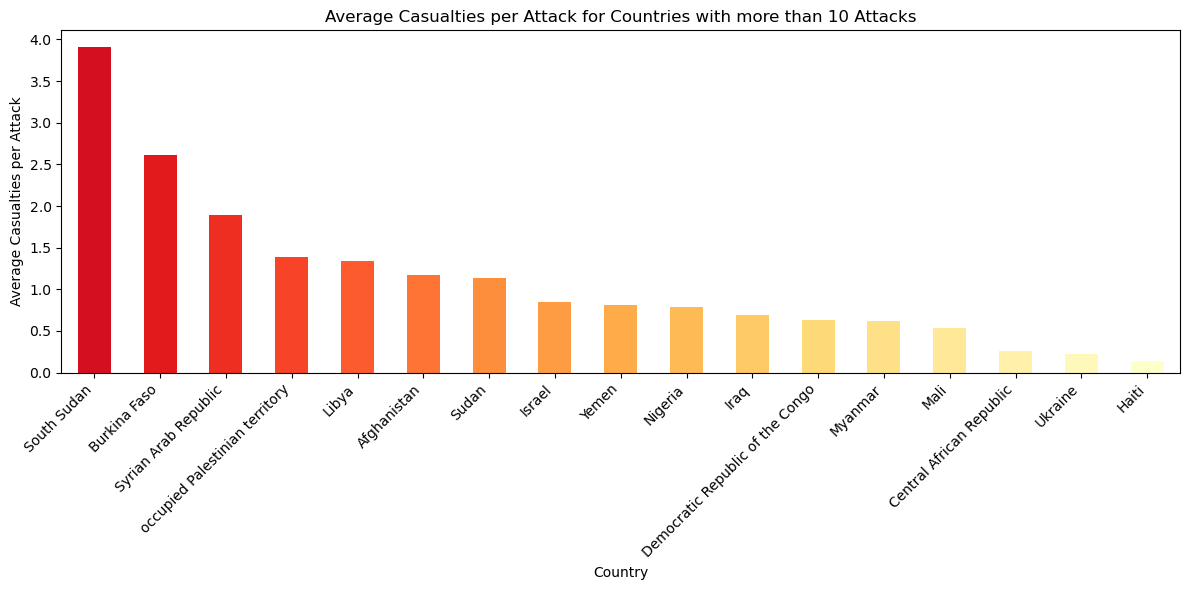

In [133]:
attacks_per_country = df['Country / Territory'].value_counts()
casualties_per_country = df.groupby('Country / Territory')['Total Injured', 'Total Death'].sum().sum(axis=1)

attacks_and_casualties_per_country = pd.concat([attacks_per_country, casualties_per_country], axis=1)
attacks_and_casualties_per_country.columns = ['Attacks', 'Casualties']

attacks_and_casualties_per_country['average_casualties_per_attack'] = attacks_and_casualties_per_country['Casualties'] / attacks_and_casualties_per_country['Attacks']
attacks_and_casualties_per_country = attacks_and_casualties_per_country[attacks_and_casualties_per_country['Attacks'] > 10]

attacks_and_casualties_per_country = attacks_and_casualties_per_country.sort_values(by='average_casualties_per_attack', ascending=False)

# Plotting the result as a bar chart
plt.figure(figsize=(12, 6))

colors = plt.cm.YlOrRd_r(np.linspace(0.2, 1, len(attacks_and_casualties_per_country)))

attacks_and_casualties_per_country['average_casualties_per_attack'].plot(kind='bar', color=colors)

plt.title('Average Casualties per Attack for Countries with more than 10 Attacks')
plt.xlabel('Country')
plt.ylabel('Average Casualties per Attack')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [135]:
# table
display(attacks_and_casualties_per_country)

,Attacks,Casualties,average_casualties_per_attack
South Sudan,35,137.0,3.914286
Burkina Faso,57,149.0,2.614035
Syrian Arab Republic,335,634.0,1.892537
occupied Palestinian territory,2114,2939.0,1.390255
Libya,146,195.0,1.335616
Afghanistan,345,405.0,1.173913
Sudan,124,141.0,1.137097
Israel,68,58.0,0.852941
Yemen,94,76.0,0.808511
Nigeria,89,70.0,0.786517


In [142]:
# number of attaks by weekdays
# day_counts = df['week_days'].value_counts()

# day_counts_sorted = day_counts.sort_values(ascending=False)
# colors = plt.cm.YlOrRd_r(np.linspace(0.2, 1, len(day_counts_sorted)))

# plt.figure(figsize=(10, 6))
# bars = day_counts_sorted.plot(kind='bar', color=colors)

# for bar, count in zip(bars.patches, day_counts_sorted):
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

# plt.title('Number of Attacks by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [143]:
# do hospitals with transportation facility get more attacks?

# df_filtered = df[df['HC Transport'] != 'Unknown']
# grouped_data = df_filtered.groupby(['Year', 'HC Transport']).size().unstack(fill_value=0)

# plt.figure(figsize=(10, 6))
# grouped_data.plot(kind='bar', color=['darkred', 'red'], width=0.4)
# plt.title('Do hospitals with transportation facility are more under target?')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()